# Probabilistic Principal Component Analysis Implementation
Implementation of Probabilistic PCA (ppca) algorithm using EM algorithm

**References**
* Tipping, M. E., & Bishop, C. M. (1999). Probabilistic Principal Component Analysis, 611–622.

***
## Probability model
Our latent variable model for d-dimensional observation vector $y$ with q-dimentional latent vector $x$ is defined as follows
\begin{align}
y &= \mathbf{W}x + \mu + \epsilon \\
x &\sim \mathcal{N} (0,I) \\
\epsilon &\sim \mathcal{N} (0,\sigma^2I)
\end{align}

where $ \mathbf{W} $ is $d \times q$ matrix. 

Then the conditional distribution of $y$ over $x$ is given by
\begin{equation}
p(y|x) = \mathcal{N} (\mathbf{W}x+\mu, \sigma^2I)
\end{equation}
and marginal distribution of $y$
\begin{equation}
p(y) = \mathcal{N} (\mu, C)
\end{equation}
where the observation covariance is specified by 
\begin{equation}
C = \mathbf{W}\mathbf{W}^\intercal +\sigma^2I
\end{equation}

Finally, the posterior distribution $p(x|y)$ can be computed as follows
\begin{align}
p(x|y,\mathbf{W},\sigma) & = \mathcal{N} \left(\mathbf{W}^\intercal C^{-1} \left(y - \mu \right),  I - \mathbf{W}^\intercal C^{-1} \mathbf{W}\right) \\
                         & = \mathcal{N} \left( M^{-1}\mathbf{W}^\intercal \left(y - \mu \right),  \sigma^2 M^{-1}\right)
\end{align}
where $ M = \mathbf{W}^\intercal\mathbf{W} +\sigma^2I $.
***



## EM for PPCA
The complete log-likelihood of the model, including both observation $\mathbf{Y} = (y_1,y_2,\cdots,y_N)$ and latent variable $\mathbf{X} = (x_1,x_2,\cdots,x_N)$, is
\begin{align}
\mathcal{L} & = \log p(\mathbf{Y},\mathbf{Z}|\mu, \mathbf{W}, \sigma^2)  \\
            & = \sum_{i=1}^N \left( \log p(y_i|x_i) + \log p(x_i)\right) \\
\end{align}
### E-step
In the $\mathbf{E}$-Step, we take the expectation of $\mathcal{L}$ with respect to the posterior distribution $p(x|y,\mathbf{W},\sigma)$
\begin{align}
\mathbf{E}\left[\mathcal{L}\right]  = &-\frac{nd}{2}\log2\pi\sigma^2 
                                       -\frac{1}{2\sigma^2}\sum_{i=1}^N||y_i-\mu||_2 
                                       +\frac{1}{\sigma^2}\sum_{i=1}^N \mathbf{E}[x_i | y_i]^\intercal \mathbf{W}^\intercal (y_i-\mu) 
                                       -\frac{1}{2\sigma^2}Tr\left( \mathbf{E}[x_i x_i^\intercal|y_i]\mathbf{W}^\intercal \mathbf{W} \right)\\
                                    &-\frac{nq}{2}\log2\pi -\frac{1}{2}\sum_{i=1}^N \mathbf{E}[x_i x_i^\intercal|y_i]
\end{align}
The conditional expectations $\mathbf{E}[x_i|y_i]$ and $\mathbf{E}[x_i x_i^\intercal|y_i]$ can be estimated using current value
\begin{align}
\mathbf{E}[x_i|y_i] & =  M^{-1}\mathbf{W}^\intercal \left(y - \bar{y} \right) \\
\mathbf{E}[x_i x_i^\intercal|y_i] & = Var(x_i) + \mathbf{E}[x_i]\mathbf{E}[x_i]^\intercal  \\
                                  & = \sigma^2 M^{-1}+ \mathbf{E}[x_i]\mathbf{E}[x_i]^\intercal  
\end{align}

### M-step
In the $\mathbf{M}$-Step, we maximize $\mathbf{E}\left[\mathcal{L}\right]$ with respect to $\mathbf{W}$ and $\sigma^2$.
First, take the derivative of $\mathbf{E}\left[\mathcal{L}\right]$ with respect to $\mathbf{W}$ and set it to 0, to get the updated $\mathbf{W}_{new}$
\begin{align}
\frac{\partial\mathbf{E}\left[\mathcal{L}\right]}{\partial \mathbf{W}}
& = \frac{1}{\sigma^2}\sum_{i=1}^N (y_i-\mu) \mathbf{E}[x_i|y_i]^\intercal   
    - \frac{1}{2\sigma^2}\sum_{i=1}^N Tr\left(\mathbf{W}_{new}\mathbf{E}[x_i x_i^\intercal|y_i]\right)\\
& = 0 \\ \\
\mathbf{W}_{new} & = \left( \sum_{i=1}^N (y_i-\mu) \mathbf{E}[x_i|y_i]^\intercal \right) \left( \sum_{i=1}^N\mathbf{E}[x_i x_i^\intercal|y_i] \right)^{-1}
\end{align}

Next, take the derivative of $\mathbf{E}\left[\mathcal{L}\right]$ with respect to $\sigma^2$ and set it to 0, to get the updated $\sigma^2_{new}$
\begin{align}
\frac{\partial\mathbf{E}\left[\mathcal{L}\right]}{\partial \sigma^2}
& = -\frac{nd}{2\sigma^2}
    +\frac{1}{2\sigma^4}\sum_{i=1}^N||y_i-\mu||_2 
    + \frac{1}{\sigma^4}\sum_{i=1}^N\mathbf{E}[x_i | y_i]^\intercal \mathbf{W}^\intercal (y_i-\mu) 
    + \frac{1}{2\sigma^4}\sum_{i=1}^NTr\left(\mathbf{E}[x_i x_i^\intercal|y_i]\mathbf{W}^\intercal \mathbf{W}\right) \\
& = 0 \\ \\
\sigma^2_{new} & = \frac{1}{nd} \sum_{i=1}^N \left(||y_i-\mu||_2 - 2\mathbf{E}[x_i | y_i]^\intercal \mathbf{W}_{new}^\intercal (y_i-\mu) + Tr\left(\mathbf{E}[x_i x_i^\intercal|y_i]\mathbf{W}_{new}^\intercal \mathbf{W}_{new}\right)\right)
\end{align}


***
## Initialization

In [48]:
import os
import numpy as np
import sklearn.datasets as ds
import matplotlib.pyplot as plt
import matplotlib.cm as plt_cm
import matplotlib.colors as plt_col

In [45]:
class PPCA(object):
	"""
    	EM-based PPCA 
    """
	def __init__(self, q=2, sigma=1.0, max_iter=50):
		# OBSERVED VARIABLE
		# y : observed variable (data)
		self.y = None
		# d : data dimentionality
		self.d = 0
		# N : number of data 
		self.N = 0
		# mu : data mean (y_bar)
		self.mu = None
		# Latent VARIABLE
		# q : latent variable dimensionality 
		self.q = q
		# sigma : standard deviation of the noise
		self.sigma = sigma
		# W : d x q matrix relating observed vs. latent variable 
		self.W = None
		# EM properties
		# max_iter : maximum iterations
		self.max_iter = max_iter
			
	def fit(self, data):
		self.y = data
		self.d = data.shape[0]
		self.N = data.shape[1]
		self.mu = np.mean(data, axis=0)
		# initialize W to small random numbers
		print('Starting EM algorithm')
		W = np.random.rand(self.d, self.q)
		mu = self.mu
		sigma = self.sigma
		q = self.q
		y = self.y
		for i in range(self.max_iter):
			print(f'Running E-step of iter {i}')
			M = np.transpose(W).dot(W) + sigma * np.eye(q)
			invM = np.linalg.inv(M)
			expZ = invM.dot(np.transpose(W)).dot((y-mu))
			expZZ = sigma*invM + expZ.dot(np.transpose(expZ))	
			print(f'Running M-step of iter {i}')
			W = ((y-mu).dot(np.transpose(expZ))).dot(np.linalg.inv(expZZ))
			one =  np.linalg.norm(y-mu)   
			two = 2*np.trace( np.transpose(expZ).dot(np.transpose(W)).dot((y-mu)) )
			three = np.trace(expZZ.dot(np.transpose(W).dot(W)))
			sigma = one -two + three
			sigma = (1/(self.N*self.d))*sigma
			sigma = np.absolute(sigma)
		self.W = W
		self.sigma = sigma


	def transform(self, data=None):
		if data is None:
			y = self.y
		[W, mu, sigma] = [self.W, self.mu, self.sigma]
		M = np.transpose(W).dot(W) + sigma * np.eye(self.q)
		invM = np.linalg.inv(M)
		x = invM.dot(np.transpose(W)).dot(y - mu)
		return x


Starting EM algorithm
Running E-step of iter 0
Running M-step of iter 0
Running E-step of iter 1
Running M-step of iter 1
Running E-step of iter 2
Running M-step of iter 2
Running E-step of iter 3
Running M-step of iter 3
Running E-step of iter 4
Running M-step of iter 4
Running E-step of iter 5
Running M-step of iter 5
Running E-step of iter 6
Running M-step of iter 6
Running E-step of iter 7
Running M-step of iter 7
Running E-step of iter 8
Running M-step of iter 8
Running E-step of iter 9
Running M-step of iter 9
Running E-step of iter 10
Running M-step of iter 10
Running E-step of iter 11
Running M-step of iter 11
Running E-step of iter 12
Running M-step of iter 12
Running E-step of iter 13
Running M-step of iter 13
Running E-step of iter 14
Running M-step of iter 14
Running E-step of iter 15
Running M-step of iter 15
Running E-step of iter 16
Running M-step of iter 16
Running E-step of iter 17
Running M-step of iter 17
Running E-step of iter 18
Running M-step of iter 18
Running E-

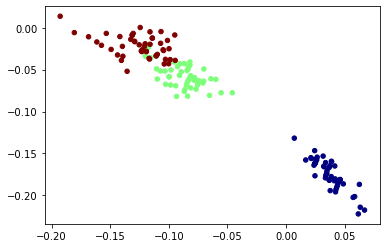

In [54]:
iris = ds.load_iris()
iris_y = np.transpose(iris.data)
iris_classes = iris.target

ppca = PPCA()
ppca.fit(iris_y)

x = ppca.transform()

def plot_scatter(x, classes, ax=None):
    ax = plt.gca() if ax is None else ax
    cmap = plt_cm.jet
    norm = plt_col.Normalize(vmin=np.min(classes), vmax=np.max(classes))
    mapper = plt_cm.ScalarMappable(cmap=cmap, norm=norm)
    colors = mapper.to_rgba(classes)
    ax.scatter(x[0, :], x[1, :], color=colors, s=20)

plot_scatter(ppca.transform(), iris_classes)